In [1]:
import sys; sys.path.append("..")
from epi_model import *

# synthetic network

In [2]:
with open("SEIRS+_graph.pickle", 'rb') as inf:
    G = pickle.load(inf)

In [ ]:
pos = nx.spring_layout(G, k=0.5, iterations=500)

In [59]:
CUTOFF = 0

In [60]:
edges,weights = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if w>=CUTOFF]);

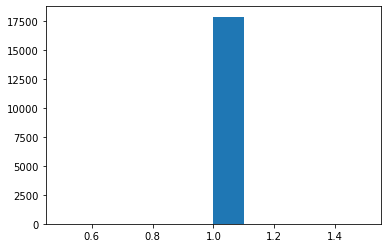

In [61]:
plt.hist(weights);

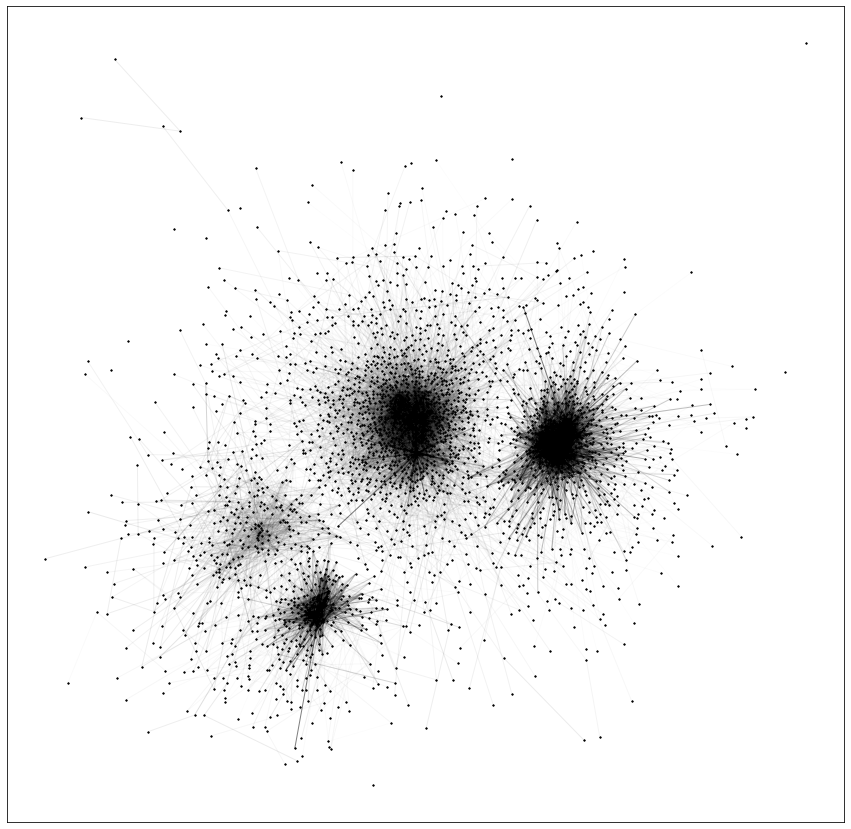

In [92]:
fig,ax = plt.subplots(figsize=(15,15))

weights = np.array(weights)
weights = np.argsort(weights)

#weights = np.log(weights)
#weights = weights + -np.min(weights)
#weights = weights / weights.max()

#node_color='b', , 
#arcs.set_color([(0,0,0,w/3) for w in weights])
nx.draw_networkx_nodes(G, pos, node_size=1, node_color='black')

#for ci,c in enumerate(colors):
#    class_nodes = [x for x in G.nodes if classes.index(a.node_attr['class'][x]) == ci]
    #col = plt.cm.gray(ci)
    #col = [list(col)]
    
#nx.draw_networkx_nodes(G, pos, node_size=20, node_color='orange', nodelist=[x for x in G.nodes if b.node_attr['role'][x] == 'staff'])

#edges2,weights2 = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if True and 'teacher' in [b.node_attr['role'][e1], b.node_attr['role'][e2]]])
#arcs = nx.draw_networkx_edges(G, pos, edgelist=edges2, edge_color=weights2, width=1, edge_cmap=plt.cm.Greys, alpha=1)
#edges3,weights3 = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if w >= 40 and 'teacher' in [b.node_attr['role'][e1], b.node_attr['role'][e2]]])
#arcs = nx.draw_networkx_edges(G, pos, edgelist=edges3, edge_color='black', width=1, edge_cmap=None, alpha=0.05)


#edgesA,weightsA = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items()])
#nx.draw_networkx_edges(G, pos, edgelist=edgesA, node_size=1, edge_color=np.log(np.array(weightsA)+1/10), width=1, edge_cmap=plt.cm.Greys, alpha=0.2)
degs = nx.degree(G)
weights = [(0,0,0,1/max(degs[i], degs[j])) for i,j in G.edges]

nx.draw_networkx_edges(G, pos, edgelist=edges, node_size=1, edge_color=weights, width=1)
nx.draw_networkx_nodes(G, pos, node_size=1, node_color='black')

    
#plt.xlim((-0.3, 0.35))
#plt.ylim((-0.45, 0.3))

plt.savefig('classes_diagram_limited.synthetic.png', dpi=300)
if False:
    plt.xlim((
        min(x[0] for x in pos.values()),
        max(x[0] for x in pos.values())
    ))
    plt.ylim((
        min(x[1] for x in pos.values()),
        max(x[1] for x in pos.values())
    ))

In [31]:
list(nbs)

[62, 228, 1832]

In [111]:
import seaborn as sb

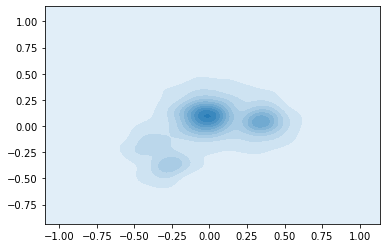

Got 11 neighbors, and G_lim now has 12 nodes
Got 10 neighbors, and G_lim now has 11 nodes
Got 30 neighbors, and G_lim now has 31 nodes
Got 64 neighbors, and G_lim now has 65 nodes
Got 28 neighbors, and G_lim now has 29 nodes
Got 14 neighbors, and G_lim now has 15 nodes


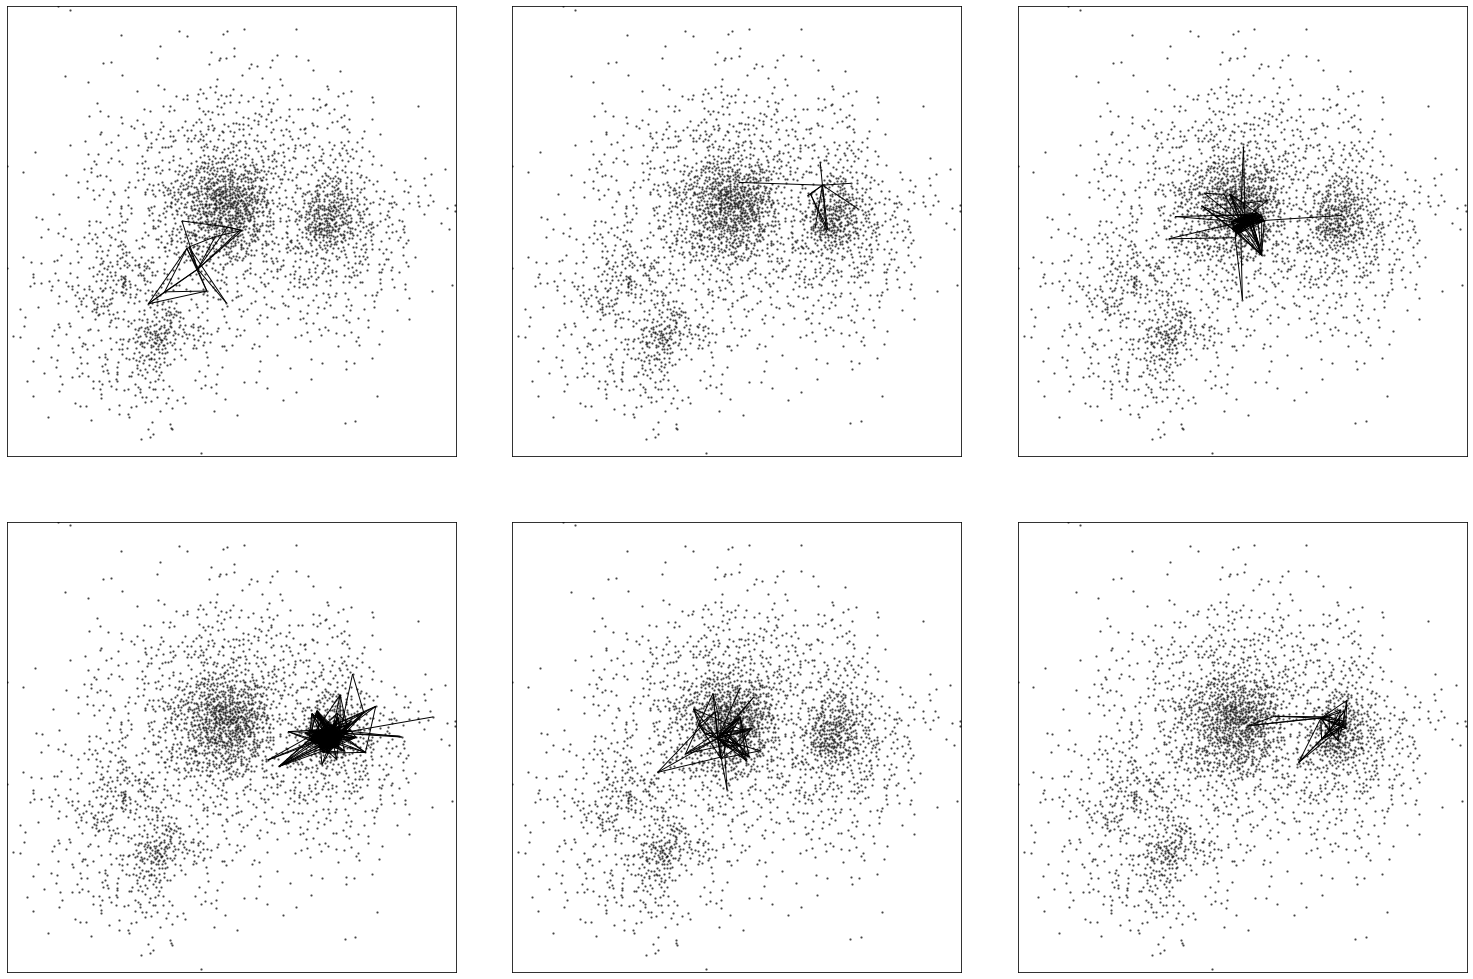

In [120]:
R,C = 2,3
#fig,ax = plt.subplots(figsize=(7*C,7*R))

#fig.tight_layout()
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(7*C,7*R))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

for i in range(R*C):
    
    plt.subplot(R,C,i+1)

    weights = np.array(weights)
    weights = np.argsort(weights)

    #weights = np.log(weights)
    #weights = weights + -np.min(weights)
    #weights = weights / weights.max()

    #node_color='b', , 
    #arcs.set_color([(0,0,0,w/3) for w in weights])

    nbs = []
    while len(nbs) < 10:
        ego = choice(list(G.nodes))
        nbs = list( nx.neighbors(G, ego) )

    G_lim = nx.subgraph(G, nbs+[ego])

    print(f'Got {len(nbs)} neighbors, and G_lim now has {len(G_lim.nodes)} nodes')


    #for ci,c in enumerate(colors):
    #    class_nodes = [x for x in G.nodes if classes.index(a.node_attr['class'][x]) == ci]
        #col = plt.cm.gray(ci)
        #col = [list(col)]

    #nx.draw_networkx_nodes(G, pos, node_size=20, node_color='orange', nodelist=[x for x in G.nodes if b.node_attr['role'][x] == 'staff'])

    #edges2,weights2 = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if True and 'teacher' in [b.node_attr['role'][e1], b.node_attr['role'][e2]]])
    #arcs = nx.draw_networkx_edges(G, pos, edgelist=edges2, edge_color=weights2, width=1, edge_cmap=plt.cm.Greys, alpha=1)
    #edges3,weights3 = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if w >= 40 and 'teacher' in [b.node_attr['role'][e1], b.node_attr['role'][e2]]])
    #arcs = nx.draw_networkx_edges(G, pos, edgelist=edges3, edge_color='black', width=1, edge_cmap=None, alpha=0.05)


    #edgesA,weightsA = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items()])
    #nx.draw_networkx_edges(G, pos, edgelist=edgesA, node_size=1, edge_color=np.log(np.array(weightsA)+1/10), width=1, edge_cmap=plt.cm.Greys, alpha=0.2)
    degs = nx.degree(G_lim)
    #weights = [(0,0,0,0.5/max(degs[i], degs[j])) for i,j in G_lim.edges]

    #edges_lim = [(a,b) for (a,b) in edges if ]
    
    nx.draw_networkx_nodes(G, pos, node_size=2, node_color='black', alpha=0.5)
    #nx.draw_networkx_nodes(G_lim, pos, nodelist=[ego], node_size=40, node_color='white', edgecolors='black', linewidths=1)
    #nx.draw_networkx_nodes(G_lim, pos, node_size=1, node_color='black')
    #nx.draw_networkx_nodes(G_lim, pos, node_size=40, node_color='white', edgecolors='black', linewidths=1)
    nx.draw_networkx_edges(G_lim, pos, node_size=1, edge_color='black', width=1, alpha=1)

    #plt.xlim((-0.3, 0.35))
    #plt.ylim((-0.45, 0.3))
    
    plt.xlim(-0.8, 0.8)
    plt.ylim(-0.8, 0.8)

plt.savefig('classes_diagram_limited.synthetic.ego.png', dpi=300)

Got 48 neighbors, and G_lim now has 49 nodes
Got 19 neighbors, and G_lim now has 20 nodes
Got 38 neighbors, and G_lim now has 39 nodes
Got 11 neighbors, and G_lim now has 12 nodes
Got 19 neighbors, and G_lim now has 20 nodes
Got 39 neighbors, and G_lim now has 40 nodes


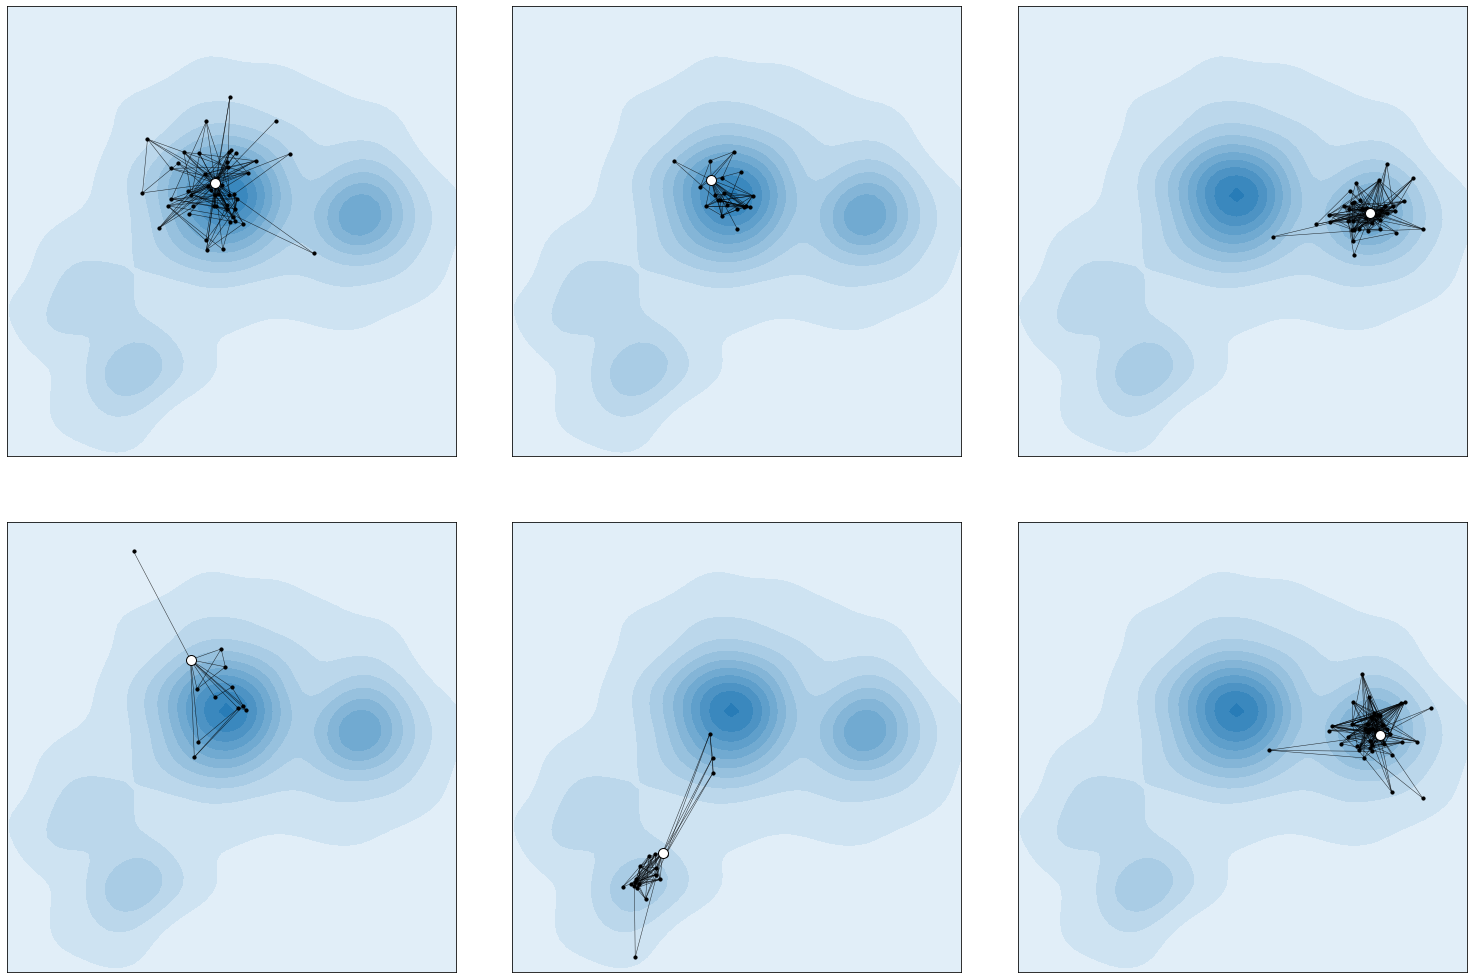

In [131]:
R,C = 2,3
#fig,ax = plt.subplots(figsize=(7*C,7*R))

#fig.tight_layout()
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(7*C,7*R))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

for i in range(R*C):
    
    plt.subplot(R,C,i+1)

    weights = np.array(weights)
    weights = np.argsort(weights)

    #weights = np.log(weights)
    #weights = weights + -np.min(weights)
    #weights = weights / weights.max()

    #node_color='b', , 
    #arcs.set_color([(0,0,0,w/3) for w in weights])

    nbs = []
    while len(nbs) < 10:
        ego = choice(list(G.nodes))
        nbs = list( nx.neighbors(G, ego) )

    G_lim = nx.subgraph(G, nbs+[ego])

    print(f'Got {len(nbs)} neighbors, and G_lim now has {len(G_lim.nodes)} nodes')

    sb.kdeplot(
        [x[0] for x in pos.values()],
        [x[1] for x in pos.values()],
        shade=True, #bw_adjust=.5
        n_levels=10
    )

    #for ci,c in enumerate(colors):
    #    class_nodes = [x for x in G.nodes if classes.index(a.node_attr['class'][x]) == ci]
        #col = plt.cm.gray(ci)
        #col = [list(col)]

    #nx.draw_networkx_nodes(G, pos, node_size=20, node_color='orange', nodelist=[x for x in G.nodes if b.node_attr['role'][x] == 'staff'])

    #edges2,weights2 = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if True and 'teacher' in [b.node_attr['role'][e1], b.node_attr['role'][e2]]])
    #arcs = nx.draw_networkx_edges(G, pos, edgelist=edges2, edge_color=weights2, width=1, edge_cmap=plt.cm.Greys, alpha=1)
    #edges3,weights3 = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if w >= 40 and 'teacher' in [b.node_attr['role'][e1], b.node_attr['role'][e2]]])
    #arcs = nx.draw_networkx_edges(G, pos, edgelist=edges3, edge_color='black', width=1, edge_cmap=None, alpha=0.05)


    #edgesA,weightsA = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items()])
    #nx.draw_networkx_edges(G, pos, edgelist=edgesA, node_size=1, edge_color=np.log(np.array(weightsA)+1/10), width=1, edge_cmap=plt.cm.Greys, alpha=0.2)
    degs = nx.degree(G_lim)
    #weights = [(0,0,0,0.5/max(degs[i], degs[j])) for i,j in G_lim.edges]

    #edges_lim = [(a,b) for (a,b) in edges if ]
    
    #nx.draw_networkx_nodes(G, pos, node_size=2, node_color='black', alpha=0.5)
    
    #nx.draw_networkx_nodes(G_lim, pos, node_size=1, node_color='black')
    #nx.draw_networkx_nodes(G_lim, pos, node_size=40, node_color='white', edgecolors='black', linewidths=1)
    nx.draw_networkx_edges(G_lim, pos, node_size=1, edge_color='black', width=0.5, alpha=0.8)
    nx.draw_networkx_nodes(G_lim, pos, nodelist=nbs, node_size=10, node_color='black')
    
    nx.draw_networkx_nodes(G_lim, pos, nodelist=[ego], node_size=100, node_color='white', edgecolors='black', linewidths=1)

    #plt.xlim((-0.3, 0.35))
    #plt.ylim((-0.45, 0.3))
    
    plt.xlim(-0.6, 0.6)
    plt.ylim(-0.6, 0.6)
    plt.xticks([],[])
    plt.yticks([],[])

plt.savefig('classes_diagram_limited.synthetic.ego.density.png', dpi=300)

Got 23 neighbors, and G_lim now has 24 nodes
Got 14 neighbors, and G_lim now has 15 nodes
Got 11 neighbors, and G_lim now has 12 nodes
Got 30 neighbors, and G_lim now has 31 nodes
Got 11 neighbors, and G_lim now has 12 nodes
Got 69 neighbors, and G_lim now has 70 nodes


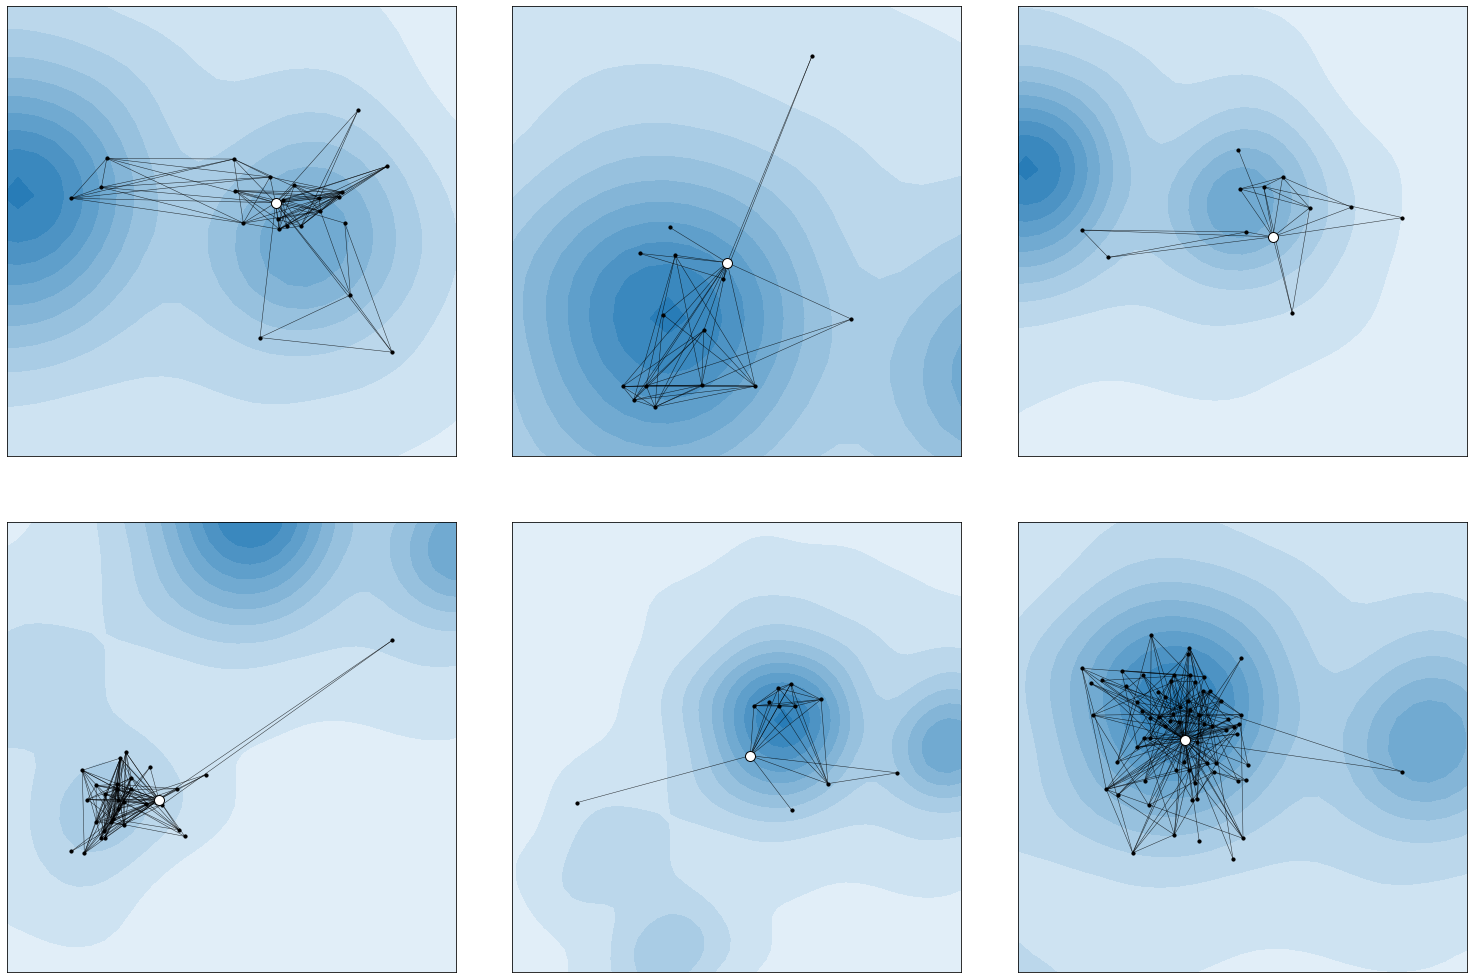

In [135]:
R,C = 2,3
#fig,ax = plt.subplots(figsize=(7*C,7*R))

#fig.tight_layout()
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(7*C,7*R))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

for i in range(R*C):
    
    plt.subplot(R,C,i+1)

    weights = np.array(weights)
    weights = np.argsort(weights)

    #weights = np.log(weights)
    #weights = weights + -np.min(weights)
    #weights = weights / weights.max()

    #node_color='b', , 
    #arcs.set_color([(0,0,0,w/3) for w in weights])

    nbs = []
    while len(nbs) < 10:
        ego = choice(list(G.nodes))
        nbs = list( nx.neighbors(G, ego) )

    G_lim = nx.subgraph(G, nbs+[ego])

    print(f'Got {len(nbs)} neighbors, and G_lim now has {len(G_lim.nodes)} nodes')

    sb.kdeplot(
        [x[0] for x in pos.values()],
        [x[1] for x in pos.values()],
        shade=True, #bw_adjust=.5
        n_levels=10
    )

    #for ci,c in enumerate(colors):
    #    class_nodes = [x for x in G.nodes if classes.index(a.node_attr['class'][x]) == ci]
        #col = plt.cm.gray(ci)
        #col = [list(col)]

    #nx.draw_networkx_nodes(G, pos, node_size=20, node_color='orange', nodelist=[x for x in G.nodes if b.node_attr['role'][x] == 'staff'])

    #edges2,weights2 = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if True and 'teacher' in [b.node_attr['role'][e1], b.node_attr['role'][e2]]])
    #arcs = nx.draw_networkx_edges(G, pos, edgelist=edges2, edge_color=weights2, width=1, edge_cmap=plt.cm.Greys, alpha=1)
    #edges3,weights3 = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if w >= 40 and 'teacher' in [b.node_attr['role'][e1], b.node_attr['role'][e2]]])
    #arcs = nx.draw_networkx_edges(G, pos, edgelist=edges3, edge_color='black', width=1, edge_cmap=None, alpha=0.05)


    #edgesA,weightsA = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items()])
    #nx.draw_networkx_edges(G, pos, edgelist=edgesA, node_size=1, edge_color=np.log(np.array(weightsA)+1/10), width=1, edge_cmap=plt.cm.Greys, alpha=0.2)
    degs = nx.degree(G_lim)
    #weights = [(0,0,0,0.5/max(degs[i], degs[j])) for i,j in G_lim.edges]

    #edges_lim = [(a,b) for (a,b) in edges if ]
    
    #nx.draw_networkx_nodes(G, pos, node_size=2, node_color='black', alpha=0.5)
    
    #nx.draw_networkx_nodes(G_lim, pos, node_size=1, node_color='black')
    #nx.draw_networkx_nodes(G_lim, pos, node_size=40, node_color='white', edgecolors='black', linewidths=1)
    nx.draw_networkx_edges(G_lim, pos, node_size=1, edge_color='black', width=0.5, alpha=0.8)
    nx.draw_networkx_nodes(G_lim, pos, nodelist=nbs, node_size=10, node_color='black')
    
    nx.draw_networkx_nodes(G_lim, pos, nodelist=[ego], node_size=100, node_color='white', edgecolors='black', linewidths=1)

    #plt.xlim((-0.3, 0.35))
    #plt.ylim((-0.45, 0.3))
    
    oxlim = plt.xlim()
    oxr = oxlim[1]-oxlim[0]
    oylim = plt.ylim()
    oyr = oylim[1]-oylim[0]
    
    xmn = min([x[0] for k,x in pos.items() if k in nbs])
    xmx = max([x[0] for k,x in pos.items() if k in nbs])
    xdif = xmx-xmn
    
    ymn = min([x[1] for k,x in pos.items() if k in nbs])
    ymx = max([x[1] for k,x in pos.items() if k in nbs])
    ydif = ymx-ymn
    
    xmn -= xdif*0.2
    xmx += xdif*0.2
    ymn -= xdif*0.2
    ymx += xdif*0.2
    
    xr = xmx-xmn
    yr = ymx-ymn
    
    if oyr / oxr > yr / xr:
        yr = xr * oyr / oxr
        
        ymean = (ymn + ymx)/2
        ymn = ymean - yr/2
        ymx = ymean + yr/2
    else:
        xr = yr * oxr / oyr
        xmean = (xmn + xmx)/2
        xmn = xmean - xr/2
        xmx = xmean + xr/2
    
    plt.xlim(xmn, xmx)
    plt.ylim(ymn, ymx)
    plt.xticks([],[])
    plt.yticks([],[])

plt.savefig('classes_diagram_limited.synthetic.ego.density.png', dpi=300)

# some other bullshit

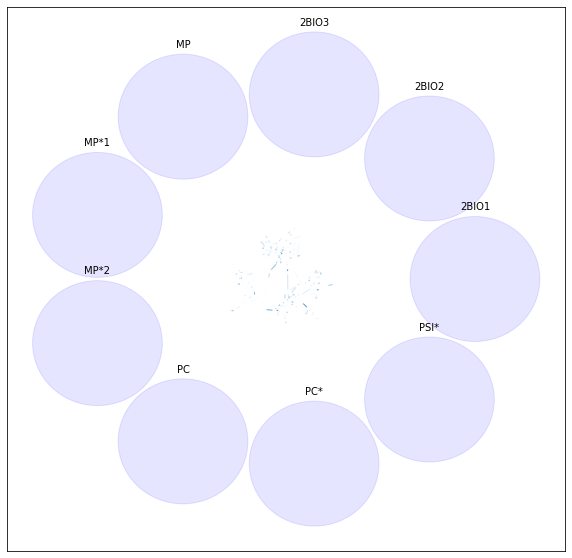

In [287]:
fig,ax = plt.subplots(figsize=(10,10))

edges,weights = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if w>=CUTOFF])

weights = np.array(weights)
weights = weights / np.max(weights)

weights = np.log(weights)
weights = weights + -np.min(weights)
weights = weights / weights.max()

#node_color='b', , 
arcs = nx.draw_networkx_edges(G, pos, edgelist=edges, node_size=1, edge_color=weights, width=1, edge_cmap=plt.cm.Blues)
#arcs.set_color([(0,0,0,w/3) for w in weights])
nx.draw_networkx_nodes(G, pos, node_size=10, node_color='white')

for i,c in enumerate(sorted(classes)):
    shift_v = np.array( [
        np.cos((i/len(classes)) * 2 * np.pi),
        np.sin((i/len(classes)) * 2 * np.pi),
    ] ) * C_DIST
        
    # draw the circles
    circ = plt.Circle(shift_v, 1, color='b', alpha=0.1)
    plt.text( shift_v[0], shift_v[1]+1.1, c, horizontalalignment='center' )
    ax.add_patch(circ)
    
plt.savefig('classes_diagram_limited.2.png', dpi=300)

# simpler 1st one...

In [143]:
wts = Counter([(u,v) for t,u,v in a.edgelist])
q8 = np.quantile( np.array(list(wts.values())), 0.8 )

In [164]:
G = nx.Graph()
G.add_nodes_from(gnodes)
G.add_weighted_edges_from([(u,v,w) for (u,v),w in wts.items() if w>=q8])
pos = nx.spectral_layout(G)

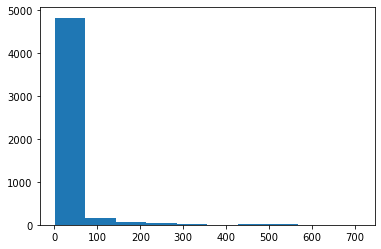

In [165]:
plt.hist( list(wts.values()) );

In [166]:
def doit(x):
    return x
    if x < 0:
        return -np.power(-x, 0.2)
    else: return np.power(x, 0.2)

In [167]:
pos_l = {
    k: [doit(v[0]), doit(v[1])]
    for k,v in pos.items()
}

In [168]:
CUTOFF = 0

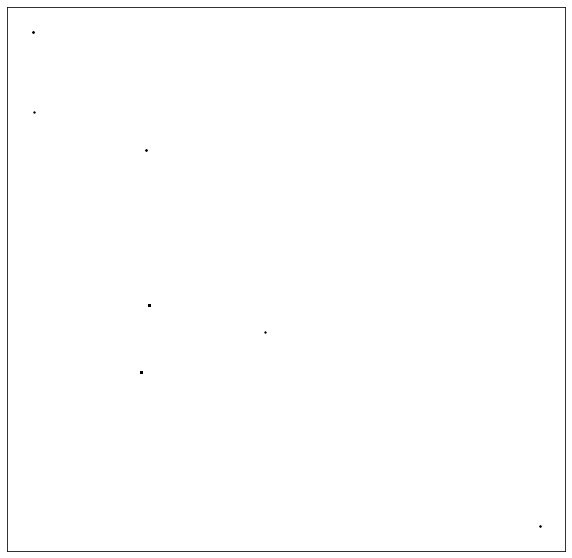

In [169]:
fig,ax = plt.subplots(figsize=(10,10))

edges,weights = zip(*[((e1,e2),w) for (e1,e2),w in nx.get_edge_attributes(G,'weight').items() if w>=CUTOFF])

weights = np.array(weights)
weights = weights / np.max(weights)

#weights = np.log(weights)
#weights = weights + -np.min(weights)
#weights = weights / weights.max()

#node_color='b', , 
arcs = nx.draw_networkx_edges(G, pos_l, edgelist=edges, node_size=1, edge_color=weights, width=1, edge_cmap=plt.cm.Blues, alpha=0.4)
#arcs.set_color([(0,0,0,w/3) for w in weights])
nx.draw_networkx_nodes(G, pos_l, node_size=1, node_color='black')
    
plt.savefig('classes_diagram_limited.1a.png', dpi=300)
if False:
    plt.xlim((-0.5, 0.5))
    plt.ylim((-0.5, 0.5))

    plt.xlim((
        min(x[0] for x in pos_l.values()),
        max(x[0] for x in pos_l.values())
    ))
    plt.ylim((
        min(x[1] for x in pos_l.values()),
        max(x[1] for x in pos_l.values())
    ))